In [26]:
# Step 1: Load and Preview Dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_telco_churn.csv', delimiter=';', engine='python')

# Preview the first rows
df .head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Music,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,Population
0,5917-RYRMG,1,United States,California,Jolon,93928,"35.930782, -121.189757","35,930782","-121,189757",Male,...,No,No,0,0,"828,48","1416,18",4,Stayed,Not Churned,254
1,8746-BFOAJ,1,United States,California,Garden Grove,92845,"33.782955, -118.026456","33,782955","-118,026456",Male,...,No,No,0,0,"487,83","917,38",4,Stayed,Not Churned,15878
2,2682-KEVRP,1,United States,California,Woodlake,93286,"36.464635, -119.094348","36,464635","-119,094348",Female,...,No,No,0,0,"756,58","1173,58",3,Stayed,Not Churned,8870
3,1855-CFULU,1,United States,California,Oakland,94619,"37.787186, -122.14633","37,787186","-122,14633",Female,...,No,No,0,0,"167,92","259,37",5,Stayed,Not Churned,24518
4,2384-OVPSA,1,United States,California,Caruthers,93609,"36.5276, -119.865999","36,5276","-119,865999",Female,...,No,No,0,0,"155,42","891,32",3,Stayed,Not Churned,5446


In [27]:
# Display shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Count of different data types
print(df.dtypes.value_counts())

# Show missing values in descending order
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Check the distribution of the target variable
print(df['Churn Value'].value_counts(normalize=True))

Shape: (7043, 54)
object    41
int64     13
Name: count, dtype: int64
Offer            3877
Internet Type    1526
Total Charges      11
Country             0
CustomerID          0
Count               0
Lat Long            0
Latitude            0
Longitude           0
Gender              0
dtype: int64
Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


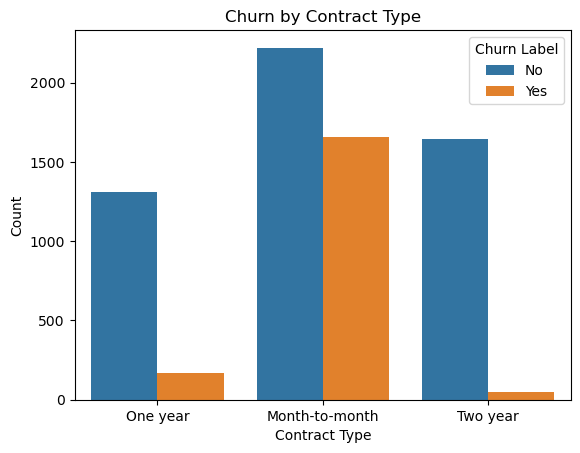

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Contract', hue='Churn Label')
plt.title('Churn by Contract Type')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.show()

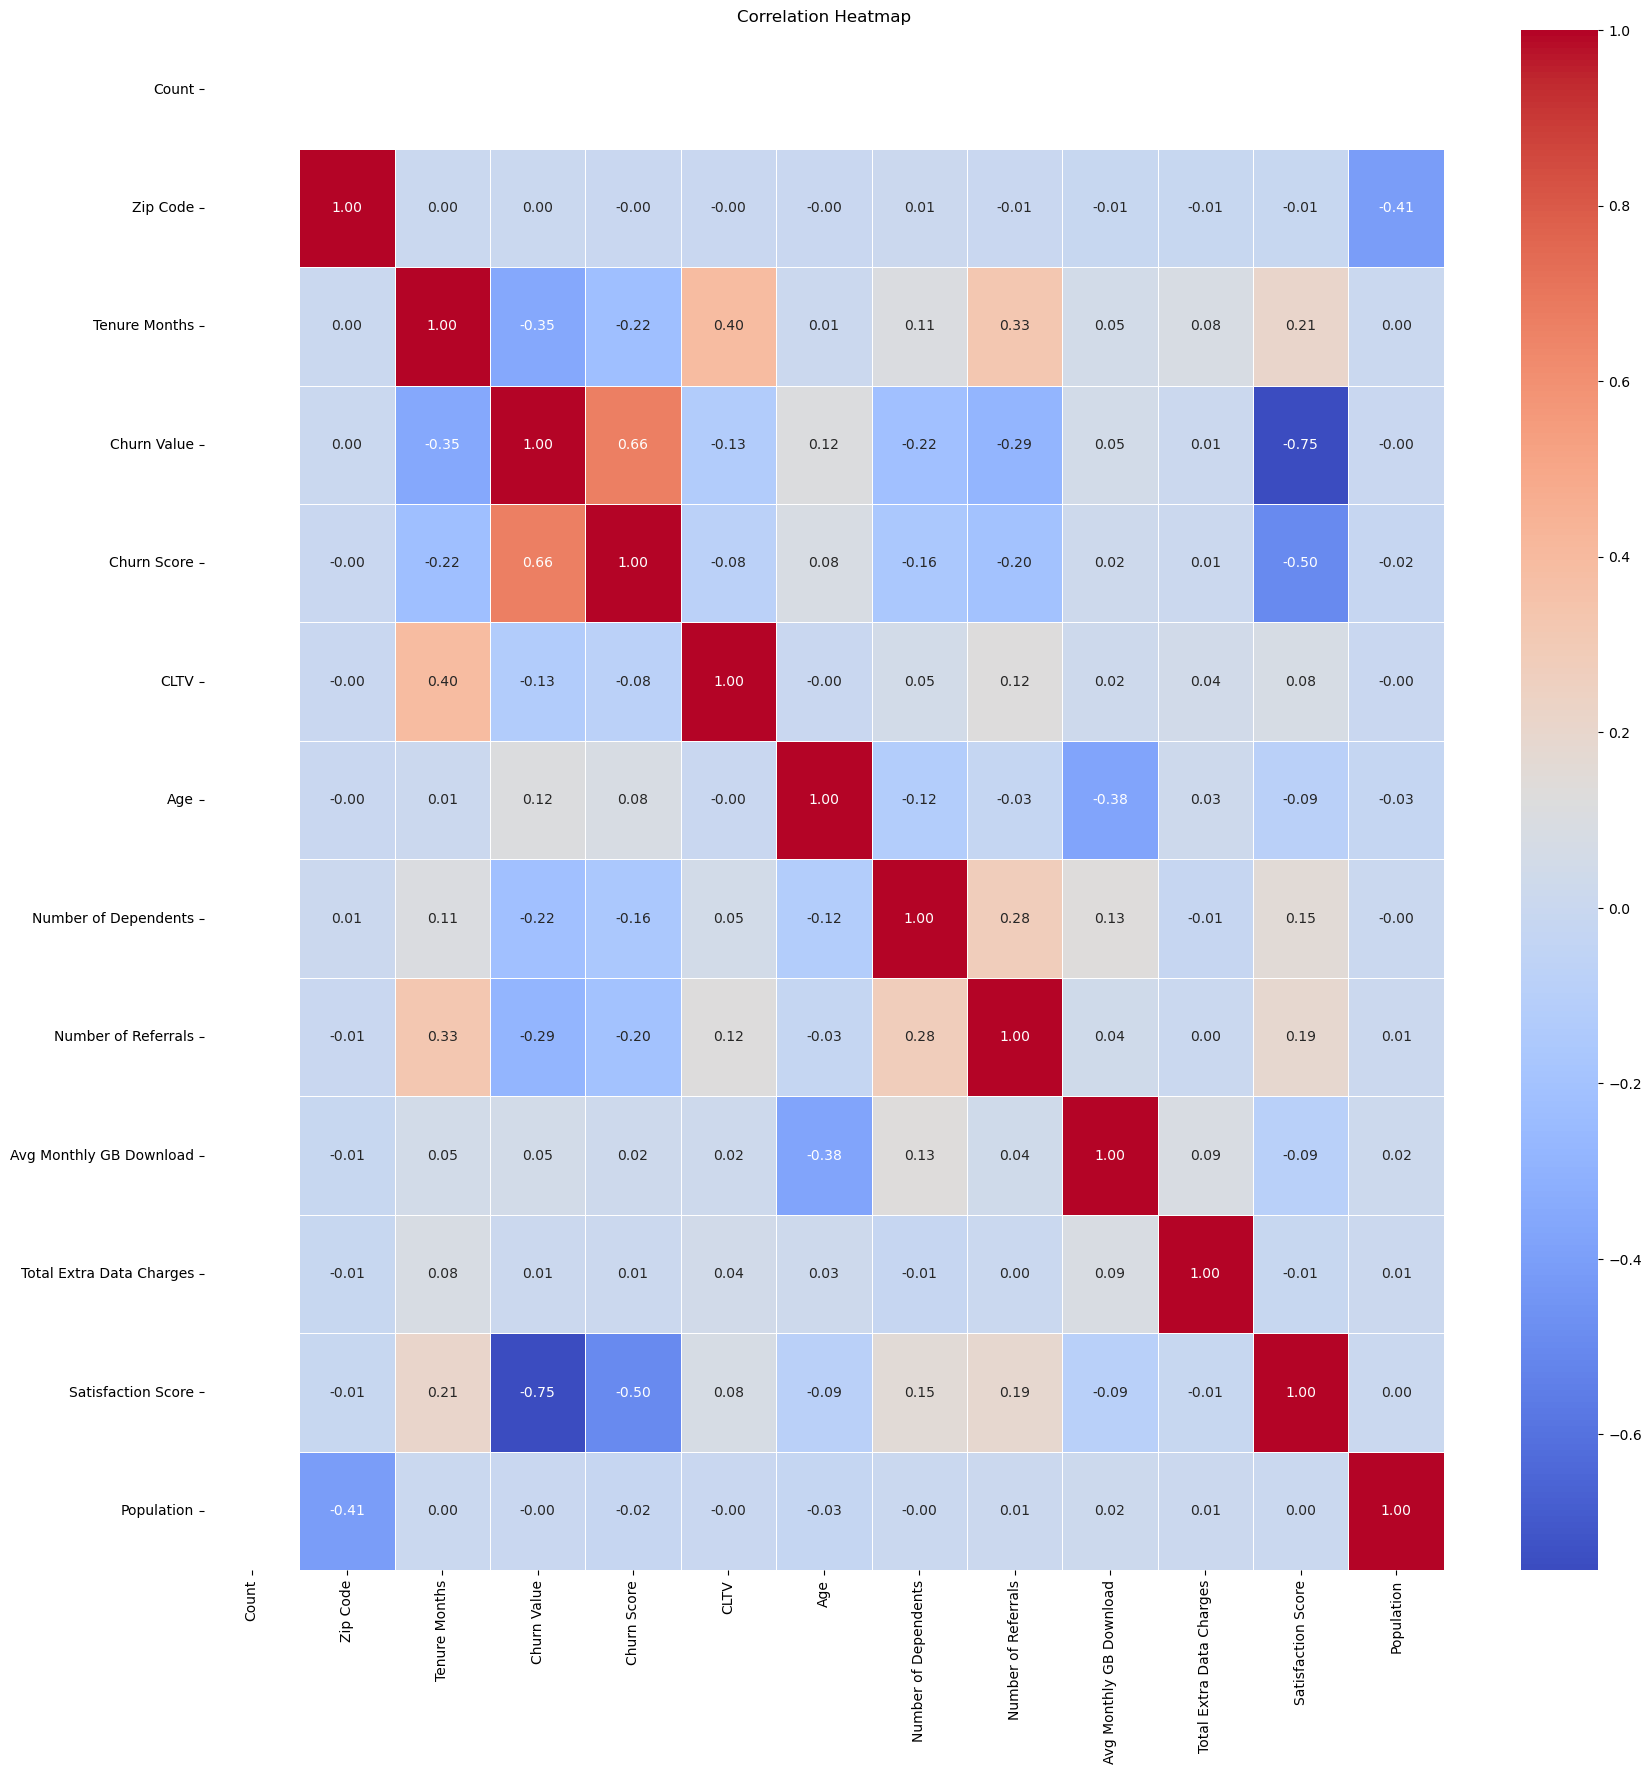

In [29]:
import numpy as np

# Ensure only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

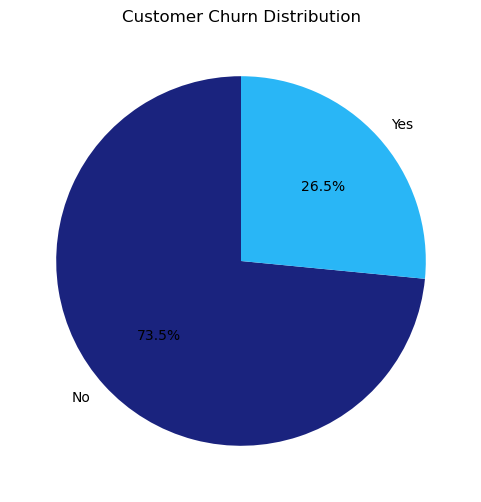

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace these numbers with your actual churn data
churn_data = pd.Series({'No': 5174, 'Yes': 1869})

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_data,
    labels=churn_data.index,
    autopct='%1.1f%%',
    startangle=450,
    colors=['#1a237e', '#29b6f6']
)
plt.title('Customer Churn Distribution')

plt.show()


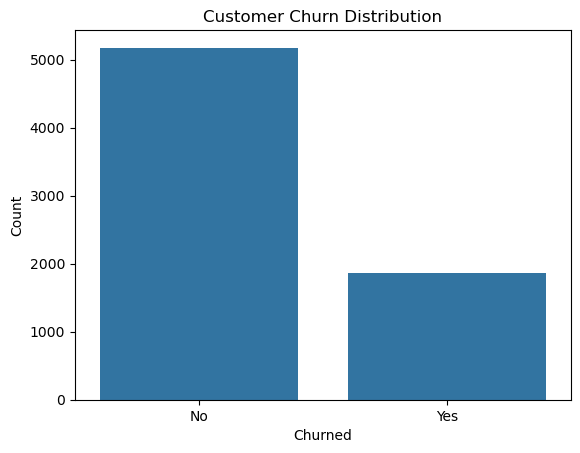

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn Label')
plt.title('Customer Churn Distribution')
plt.ylabel('Count')
plt.xlabel('Churned')
plt.show()

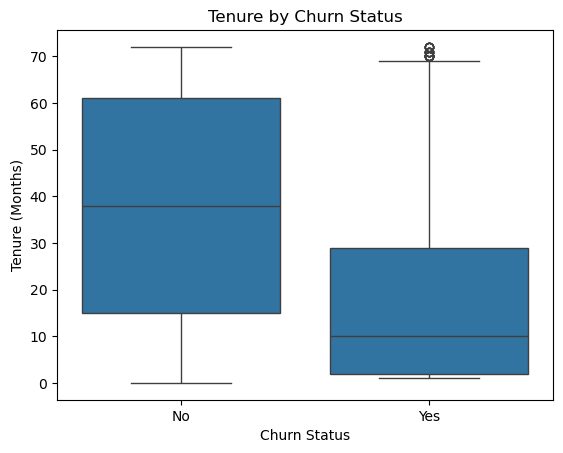

In [31]:
sns.boxplot(data=df, x='Churn Label', y='Tenure Months')
plt.title('Tenure by Churn Status')
plt.ylabel('Tenure (Months)')
plt.xlabel('Churn Status')
plt.show()

In [32]:
# Step 2: Clean Data

# Convert Total Charges to numeric and fill missing values with median
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

# Fill missing values for categorical features
df['Offer'] = df['Offer'].fillna('None')
df['Internet Type'] = df['Internet Type'].fillna('Unknown')

# Drop unnecessary columns (e.g., location or identifier info)
df.drop(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [33]:
# Step 3: Encode Categorical Variables

# Label Encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents',
    'Phone Service', 'Paperless Billing', 'Under 30',
    'Married', 'Referred a Friend', 'Unlimited Data'
]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-category columns
one_hot_cols = [
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Payment Method', 'Churn Label', 'Churn Reason', 'Quarter',
    'Offer', 'Internet Type', 'Streaming Music', 'Customer Status', 'Churn Category'
]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Convert important numeric columns from object to float
cols_to_numeric = [
    'Monthly Charges', 'Avg Monthly Long Distance Charges',
    'Total Refunds', 'Total Long Distance Charges', 'Total Revenue'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[cols_to_numeric] = df[cols_to_numeric].fillna(df[cols_to_numeric].median())

In [15]:
# Create a new feature that indicates the ratio between how long a customer has stayed and how much they pay monthly. 
# It helps identify low-value or high-risk profiles
df['Tenure_MonthlyCharges_Ratio'] = df['Tenure Months'] / (df['Monthly Charges'] + 1e-6)


In [16]:
# Create CLTV Category using quantiles
df['CLTV Segment'] = pd.qcut(df['CLTV'], q=3, labels=['Low', 'Medium', 'High'])


In [17]:
# Label–encode CLTV Segment (ordinal)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CLTV Segment'] = le.fit_transform(df['CLTV Segment'])

In [41]:
# Step 4: Split Data & Handle Imbalance

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Manual Oversampling to balance classes
train_data = pd.concat([X_train, y_train], axis=1)
churn_yes = train_data[train_data['Churn Value'] == 1]
churn_no = train_data[train_data['Churn Value'] == 0]
churn_yes_oversampled = churn_yes.sample(len(churn_no), replace=True, random_state=42)
balanced_train = pd.concat([churn_no, churn_yes_oversampled]).sample(frac=1, random_state=42)

# Final training sets
X_train_bal = balanced_train.drop('Churn Value', axis=1)
y_train_bal = balanced_train['Churn Value']


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression
Accuracy: 0.9609652235628106
Precision: 0.8918918918918919
Recall: 0.9705882352941176
F1 Score: 0.9295774647887324
ROC AUC: 0.994091813273399


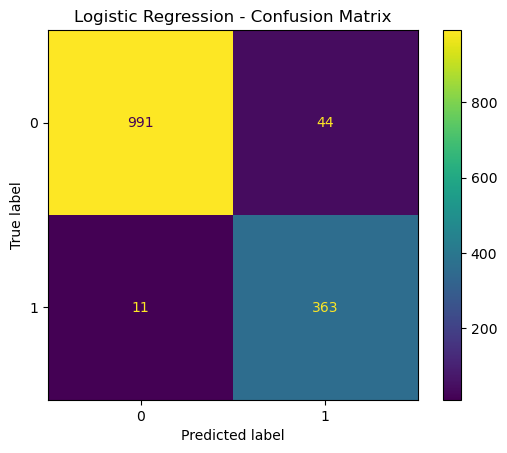


🔹 Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


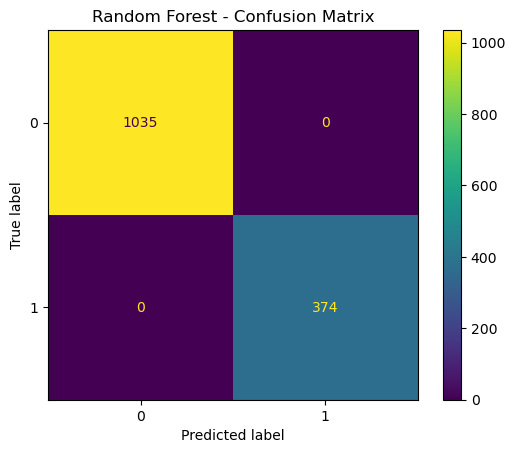

C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


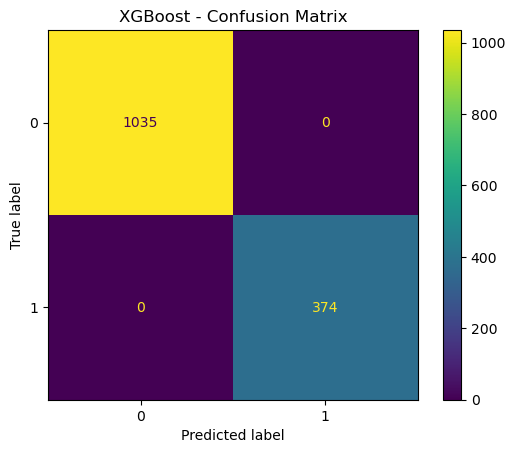

In [19]:
# Step 5: Train ML Models & Evaluate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Evaluation function for all models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🔹 {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Train models
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)
evaluate_model(lr, X_test, y_test, "Logistic Regression")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
evaluate_model(rf, X_test, y_test, "Random Forest")

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)
evaluate_model(xgb, X_test, y_test, "XGBoost")


Churn Value                       1.000000
Churn Label_Yes                   1.000000
Churn Score                       0.664897
Churn Category_Competitor         0.612690
Churn Category_Dissatisfaction    0.352777
                                    ...   
Satisfaction Score               -0.754649
Customer Status_Stayed           -0.856718
Churn Reason_Not Churned         -1.000000
Churn Category_Not Churned       -1.000000
Count                                  NaN
Name: Churn Value, Length: 89, dtype: float64

🔹 Random Forest (Cleaned)
Accuracy: 0.9410929737402413
Precision: 0.9266862170087976
Recall: 0.8449197860962567
F1 Score: 0.8839160839160839
ROC AUC: 0.9866000155002713


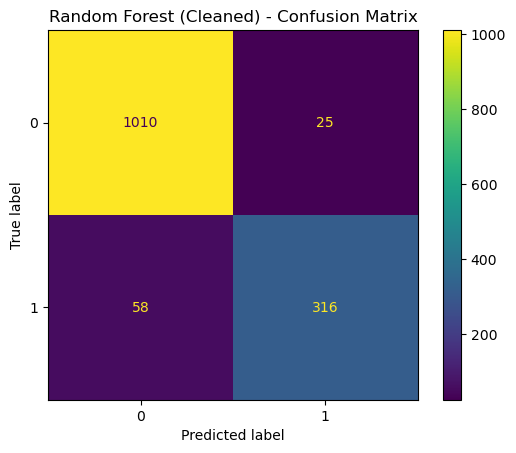

C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:16:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost(Cleaned)
Accuracy: 0.9410929737402413
Precision: 0.9266862170087976
Recall: 0.8449197860962567
F1 Score: 0.8839160839160839
ROC AUC: 0.9866000155002713


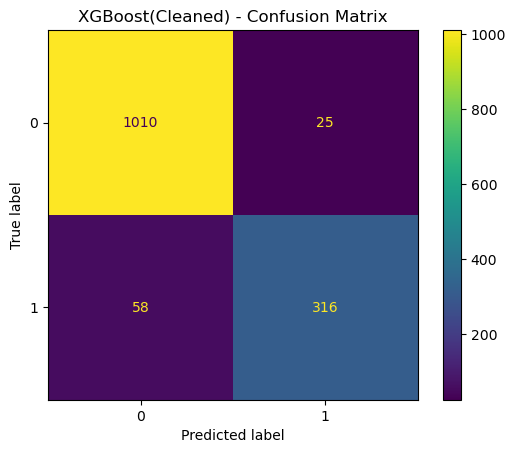

C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:16:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:16:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:16:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:16:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

CV accuracy: 0.996 ± 0.001
CV precision: 0.996 ± 0.002
CV recall: 0.995 ± 0.002
CV f1: 0.996 ± 0.001
CV roc_auc: 1.000 ± 0.000

Training set performance:

🔹 XGBoost (Training)
Accuracy: 0.9989127808649432
Precision: 0.999274661508704
Recall: 0.998550374486591
F1 Score: 0.9989123867069486
ROC AUC: 0.9999969646240358


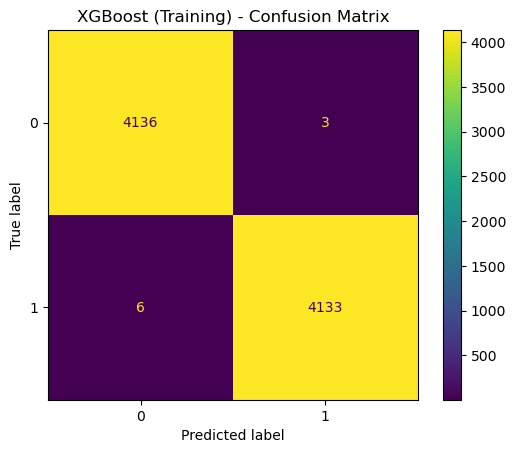


🔹 XGBoost (Cleaned)
Accuracy: 0.9822569198012775
Precision: 0.9943342776203966
Recall: 0.9385026737967914
F1 Score: 0.9656121045392022
ROC AUC: 0.9959802629879356


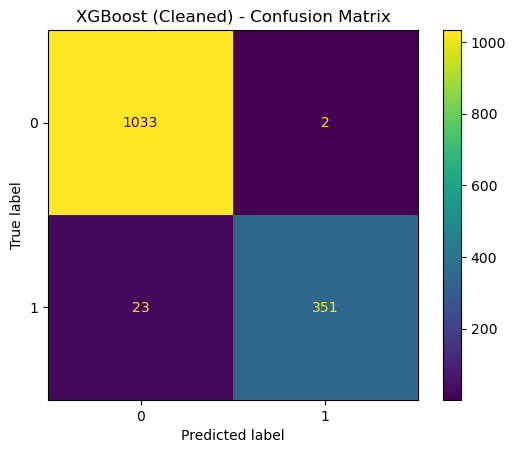

In [21]:
# Step 6: Feature Leakage Check & Model Retraining

# Correlation with target
corr = df.corr(numeric_only=True)['Churn Value'].sort_values(ascending=False)
print(corr)

# Manually identified leaky features
leaky_columns = [
    'Churn Label_Yes', 'Churn Score', 'Churn Category_Competitor',
    'Churn Category_Dissatisfaction', 'Churn Reason_Not Churned',
    'Churn Category_Not Churned', 'Customer Status_Stayed', 'Satisfaction Score'
]

# Drop leaky features and retrain
X_train_bal_clean = X_train_bal.drop(leaky_columns, axis=1)
X_test_clean      = X_test.drop(leaky_columns, axis=1)

# Retrain Random Forest
rf.fit(X_train_bal_clean, y_train_bal)
evaluate_model(rf, X_test_clean, y_test, "Random Forest (Cleaned)")

# Retrain XGBoost
xgb.fit(X_train_bal_clean, y_train_bal)
evaluate_model(rf, X_test_clean, y_test, "XGBoost(Cleaned)")

# cross-validation and training‐set evaluation
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision','recall','f1','roc_auc']
cv_results = cross_validate(
    xgb,
    X_train_bal_clean,
    y_train_bal,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

for metric in scoring:
    mean = cv_results[f'test_{metric}'].mean()
    std  = cv_results[f'test_{metric}'].std()
    print(f"CV {metric}: {mean:.3f} ± {std:.3f}")

print("\nTraining set performance:")
evaluate_model(xgb, X_train_bal_clean, y_train_bal, "XGBoost (Training)")

# Now evaluate on the test set
evaluate_model(xgb, X_test_clean, y_test, "XGBoost (Cleaned)")

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use logistic regression as the base model for RFE
rfe_model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=10)
rfe.fit(X_train_bal_clean, y_train_bal)

# Get selected feature names
selected_features = X_train_bal_clean.columns[rfe.support_]
print("Top 10 selected features by RFE:")
print(selected_features)


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top 10 selected features by RFE:
Index(['Churn Reason_Attitude of support person',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_Competitor offered higher download speeds',
       'Churn Reason_Competitor offered more data',
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Network reliability', 'Churn Reason_Price too high',
       'Churn Reason_Product dissatisfaction', 'Churn Category_Other'],
      dtype='object')


Predicted     0    1
Actual              
0          1033    2
1            23  351


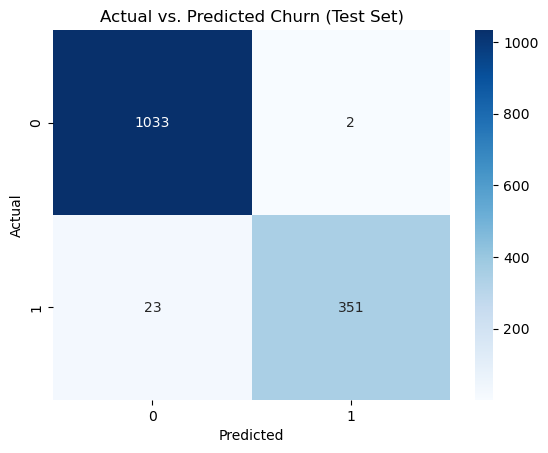

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Predict churn on the test set
y_pred = xgb.predict(X_test_clean)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Create a crosstab for counts
comparison_ct = pd.crosstab(comparison_df['Actual'], comparison_df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

print(comparison_ct)

# Optionally, visualize the results
sns.heatmap(comparison_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Actual vs. Predicted Churn (Test Set)')
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


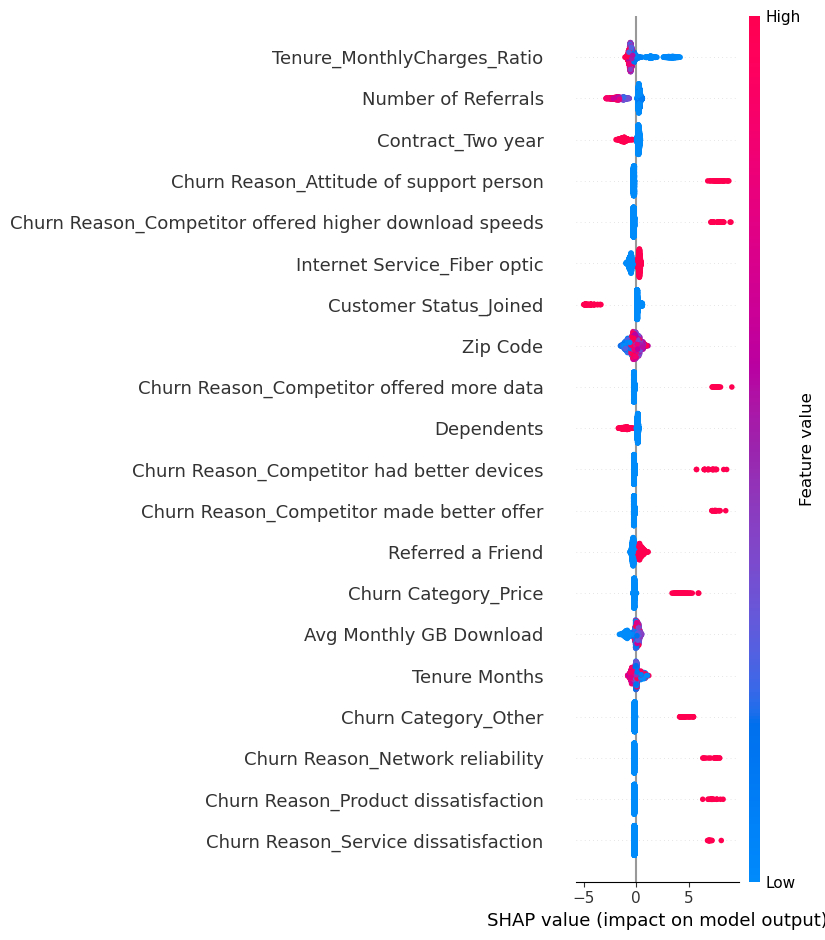

In [34]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_clean)

# Plot summary
shap.summary_plot(shap_values, X_test_clean)


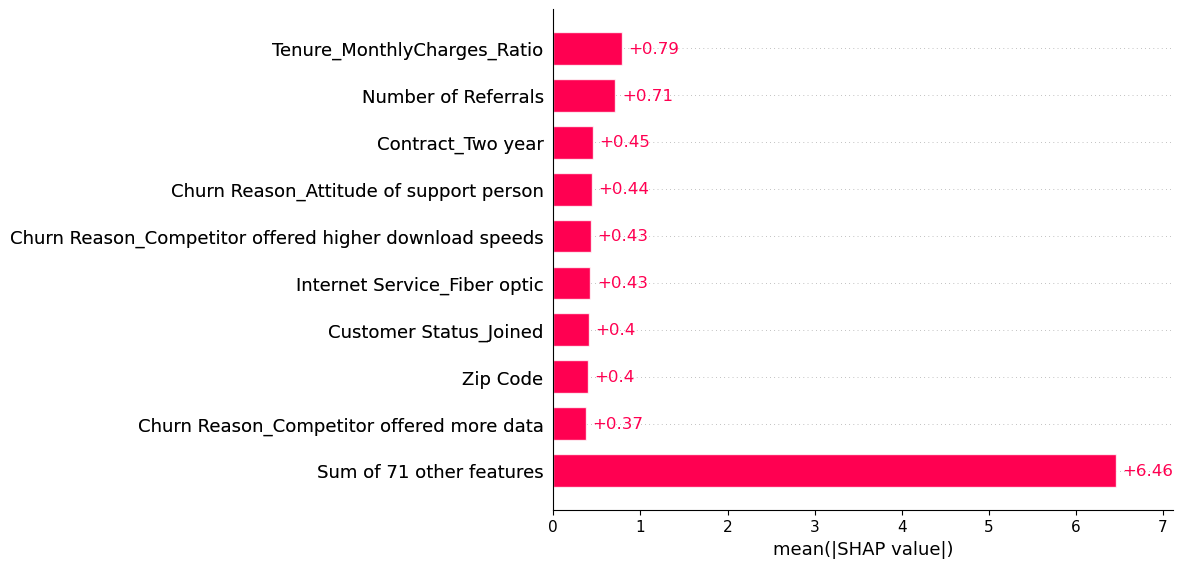

In [35]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_clean)

shap.plots.bar(shap_values, max_display=10)